# Fashion MNIST

# Building the model using deep learning

Problem statement:
    
Zalando's article images with a dimension of 28x28 which are grayscales.The images are associated with 10 different classes.
Our aim is to classify the images.


Description :
    
The dataset contains the images of articles in the form of pixel values and its labels in target variable.
    
class labels ---> 0:t-shirt/top, 1:trouser, 2:pullover, 3:dress, 4:coat, 5:sandal, 6:shirt, 7:sneaker, 8:bag, 9:ankle boot
                                        
We have to classify the images on test data after training the model using the train data. For implementing this i am using
deep learning methodology.
                                        

Tasks perfromed :
    
1) Read the dataset & EDA analysis on the dataset

2) building the sequential model

3) evaluation of model on test data based on accuracy metrics

4) checking the predicted labels are matching the original test images using plot



In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fash_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fash_mnist.load_data()

In [3]:
class_names=['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankleboot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
# each 'train_images' record represents the image in the form of pixels
# train_images[0]/train_labels[0] ---> represent the ankle boot(9-label)

In [9]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
train_labels[0]

9

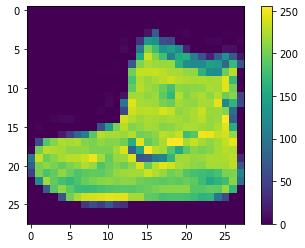

In [11]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [12]:
# label-0 --> means t-shirt/top

In [13]:
train_labels[1]

0

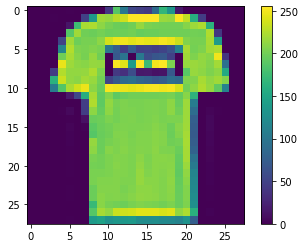

In [14]:
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

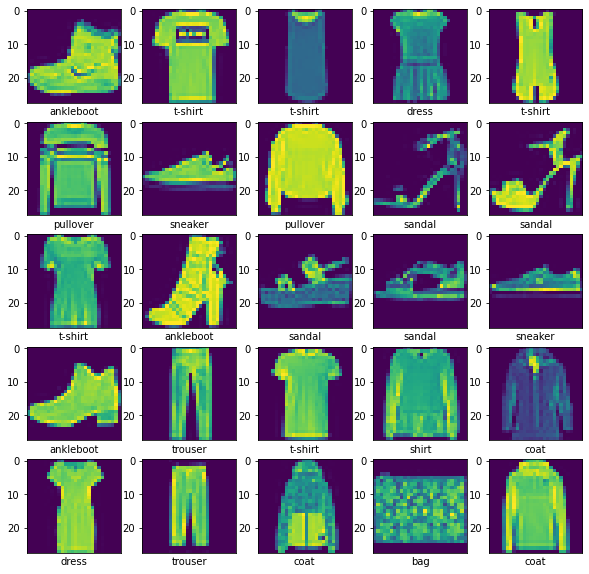

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
test_images.shape

(10000, 28, 28)

In [18]:
# X_train is 60000 rows of 28x28 values=784; we reshape it to # 60000 x 784. 

train_images=train_images.reshape(60000,784)
test_images=test_images.reshape(10000,784)

# normalizing the values within range of [0,1]
#intensity of each pixel is divided by 255, the maximum intensity of pixel value(is 255) & low intensity of pixel value(is 0)

train_images=train_images/255
test_images=test_images/255

# One-hot representation of the labels.
train_labels=keras.utils.to_categorical(train_labels,num_classes=10)
test_labels=keras.utils.to_categorical(test_labels,num_classes=10)


In [19]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
np.unique(train_labels)

array([0., 1.], dtype=float32)

In [21]:
test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Loss Functions
Keras Loss Functions : https://keras.io/api/losses/

**binary_crossentropy** --> Binary Classification

**categorical_crossentropy**--> Multi Class classification with labels in OneHotEncoded format

**sparse_categorical_crossentropy** function --> Multi Class Classification with labels in integers

for binary classification -->

1) hidden layer should have activation function as 'Relu' 

2) output layer should have activation function as 'sigmoid'

3) loss function --> cross entropy


for multi-classification -->


1) hidden layer should have activation function as 'Relu' 

2) output layer should have activation function as 'softmax'

3) loss function --> cross entropy


for regression problems --> 

1) hidden layer should have activation function as 'Relu' 

2) output layer should have activation function as 'Relu or none'

3) loss function --> MSE/MAE

In [22]:
model=Sequential()
# layer1 -->
model.add(Dense(128,name='dense_layer1',input_shape=(784,),activation='relu'))
# output layer-->softmax to decide the multiclassification
model.add(Dense(10,name='dense_layer2',activation='softmax'))

In [23]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics='accuracy')

In [24]:
model.fit(train_images,train_labels,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0634 - accuracy: 0.6670 - val_loss: 0.5773 - val_accuracy: 0.8072
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5500 - accuracy: 0.8155 - val_loss: 0.5029 - val_accuracy: 0.8273
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4930 - accuracy: 0.8332 - val_loss: 0.4871 - val_accuracy: 0.8277
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4612 - accuracy: 0.8413 - val_loss: 0.4571 - val_accuracy: 0.8431
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4491 - accuracy: 0.8437 - val_loss: 0.4385 - val_accuracy: 0.8461
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4304 - accuracy: 0.8535 - val_loss: 0.4325 - val_accuracy: 0.8529
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4137 - accuracy: 0.8573 - val_loss: 0.4209 - val_accuracy:

In [26]:
# we get the history of above model fit values
# we get values of ['loss', 'accuracy', 'val_loss', 'val_accuracy']
# based on these values we can plot the graph

In [27]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
# plot of accuracy & validation accuracy w.r.t no. of epochs

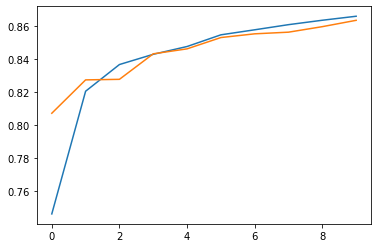

In [30]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

In [77]:
# plot of loss & val_loss w.r.t no. of epochs
# from this plot we can observe that we can increase the no. of epochs to get global minimum point(where the loss is minimum)

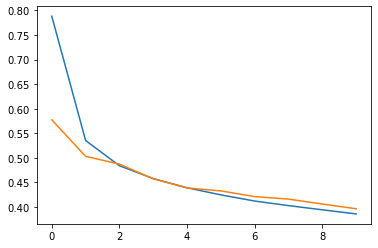

In [34]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

In [35]:
# model accuracy & loss on test data

In [37]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels)
print(f'accuracy:{test_accuracy}')
print(f'loss:{test_loss}')

313/313 [==============================] - 1s 2ms/step - loss: 0.4229 - accuracy: 0.8522
accuracy:0.8521999716758728
loss:0.4228816032409668


In [76]:
# predictions on test data
# checking whether our predictions are matching with the test data using plots

In [42]:
test_pred=model.predict(test_images)
test_pred

array([[1.1052030e-05, 1.0904072e-06, 3.1138072e-05, ..., 1.3468528e-01,
        3.7107305e-03, 7.6299095e-01],
       [8.6850690e-05, 1.2596693e-06, 9.8318487e-01, ..., 1.9508433e-13,
        1.0607728e-05, 5.7687254e-11],
       [8.0937562e-06, 9.9996662e-01, 7.9516640e-06, ..., 5.0757691e-08,
        5.6170597e-07, 1.4579503e-09],
       ...,
       [2.4767164e-02, 1.6507875e-05, 1.7103136e-03, ..., 1.6108478e-04,
        9.3175852e-01, 9.0834756e-06],
       [8.1448543e-06, 9.9936813e-01, 2.2976194e-05, ..., 1.4091721e-06,
        1.7951811e-06, 2.0402258e-06],
       [1.8781018e-04, 7.3476294e-05, 4.0553074e-04, ..., 9.0682872e-02,
        1.1081451e-02, 5.7592047e-03]], dtype=float32)

In [67]:
# images of actual test data

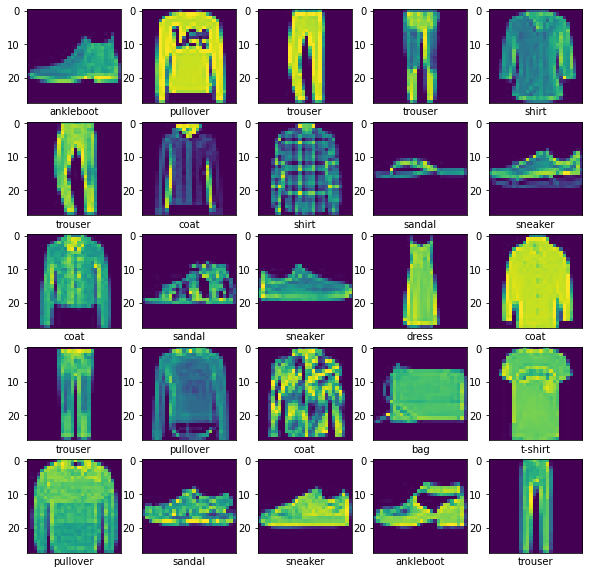

In [75]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.imshow(test_images_new[i].reshape(28,28))
    plt.xlabel(class_names[test_labels[i].tolist().index(1)])    

In [72]:
# predicted label names based on model fit

In [74]:
for i in range(25):
    print(f'predicted label name of image{i} is {class_names[np.argmax(test_pred[i])]}')

predicted label name of image0 is ankleboot
predicted label name of image1 is pullover
predicted label name of image2 is trouser
predicted label name of image3 is trouser
predicted label name of image4 is shirt
predicted label name of image5 is trouser
predicted label name of image6 is coat
predicted label name of image7 is shirt
predicted label name of image8 is sandal
predicted label name of image9 is sneaker
predicted label name of image10 is coat
predicted label name of image11 is sandal
predicted label name of image12 is sandal
predicted label name of image13 is dress
predicted label name of image14 is coat
predicted label name of image15 is trouser
predicted label name of image16 is pullover
predicted label name of image17 is coat
predicted label name of image18 is bag
predicted label name of image19 is t-shirt
predicted label name of image20 is pullover
predicted label name of image21 is sneaker
predicted label name of image22 is sneaker
predicted label name of image23 is sneake